In [ ]:
# DAY 10

In [ ]:
# Use correlation matrix to select most important features.
# Use Seaborn heatmap

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('./boston_house/HousingData.csv')
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [6]:
corr = df.corr()
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.191178  0.401863 -0.054355  0.417130 -0.219150  0.354342   
ZN      -0.191178  1.000000 -0.531871 -0.037229 -0.513704  0.320800 -0.563801   
INDUS    0.401863 -0.531871  1.000000  0.059859  0.764866 -0.390234  0.638431   
CHAS    -0.054355 -0.037229  0.059859  1.000000  0.075097  0.104885  0.078831   
NOX      0.417130 -0.513704  0.764866  0.075097  1.000000 -0.302188  0.731548   
RM      -0.219150  0.320800 -0.390234  0.104885 -0.302188  1.000000 -0.247337   
AGE      0.354342 -0.563801  0.638431  0.078831  0.731548 -0.247337  1.000000   
DIS     -0.374166  0.656739 -0.711709 -0.093971 -0.769230  0.205246 -0.744844   
RAD      0.624765 -0.310919  0.604533  0.001468  0.611441 -0.209847  0.458349   
TAX      0.580595 -0.312371  0.731055 -0.032304  0.668023 -0.292048  0.509114   
PTRATIO  0.281110 -0.414046  0.390954 -0.111304  0.188933 -0.355501  0.269226   
B       -0.381411  0.171303 

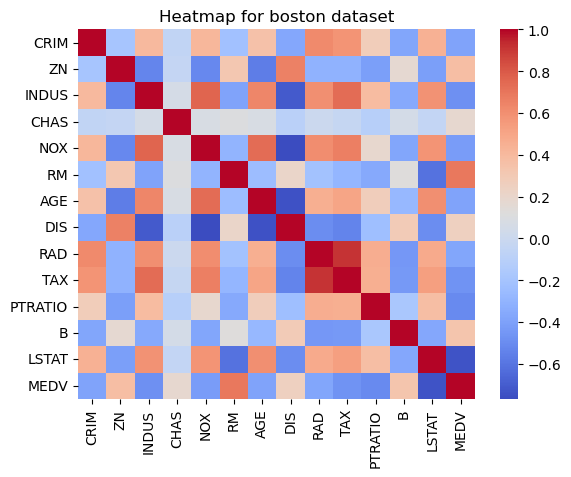

In [12]:
plt.title('Heatmap for boston dataset')
sns.heatmap(corr,cmap='coolwarm')
plt.show()

In [17]:
cor_t=corr["MEDV"]
strg = cor_t[abs(cor_t) > 0.5]
rem=strg.drop('MEDV')
print("Important features using correlation:",rem)

Important features using correlation: RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


In [ ]:
# DAY 11

In [ ]:
# Train-Test split
# Fit a Linear Regression Model
# Evaluate the Model
# Use MSE, RMSE, R² score.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [8]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [9]:
from sklearn.impute import SimpleImputer

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
imu=SimpleImputer(strategy='mean')
x_traini = imu.fit_transform(x_train)
x_test1 = imu.transform(x_test)

In [13]:
model=LinearRegression()
model.fit(x_traini,y_train)


LinearRegression()

In [14]:
y_pred=model.predict(x_test1)

In [21]:
r2=r2_score(y_test,y_pred)
print("R2 score for this model is:",r2) 
mse=mean_squared_error(y_test, y_pred)
print("MSE is :",mse)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Rmse is:",rmse)

R2 score for this model is: 0.659060424186024
MSE is : 25.00238892351461
Rmse is: 5.000238886644778


In [ ]:
# DAY 12

In [ ]:
# Report Generation
# Ask learners to write a mini-report with insights, evaluation, and conclusion.

In [23]:
report = f"""
Mini Report: Regression Model 
Objective:
The goal of this model is to predict the target variable based on input features which are being selected.

Model Used:
Linear Regression was used because of its simplicity.

Insights from Evaluation Metrics:
1) Mean Squared Error (MSE): {mse:.2f}
2) Root Mean Squared Error (RMSE): {rmse:.2f}
3) R² Score: {r2:.2f}

Evaluation:
The model explains approx {r2:.1f}% of the variance in the target variable. 
An RMSE of {rmse:.2f} suggests that, on average, the predictions deviate from actual values by this amount.

Conclusion & Next Steps:
This model provides a good baseline. Future improvements could include feature engineering, using regularized models,
or trying more complex algorithms if needed. Cross-validation could also help validate generalization performance.
"""

print(report)


Mini Report: Regression Model 
Objective:
The goal of this model is to predict the target variable based on input features which are being selected.

Model Used:
Linear Regression was used because of its simplicity.

Insights from Evaluation Metrics:
1) Mean Squared Error (MSE): 25.00
2) Root Mean Squared Error (RMSE): 5.00
3) R² Score: 0.66

Evaluation:
The model explains approx 0.7% of the variance in the target variable. 
An RMSE of 5.00 suggests that, on average, the predictions deviate from actual values by this amount.

Conclusion & Next Steps:
This model provides a good baseline. Future improvements could include feature engineering, using regularized models,
or trying more complex algorithms if needed. Cross-validation could also help validate generalization performance.

